In [12]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv("tmp/debug.txt", delimiter="\t", low_memory=False)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df

,Datetime,Total_Buy_Agg_Volume,Total_Sell_Agg_Volume,Delta_Agg,Delta_Agg_Abs,Open,High,Low,Close,Structure,...,Real_Movement,Buy_Agg_Per_Displacement,Buy_Agg_Per_Displacement_Avg,Buy_Volume_Avg,Sell_Agg_Per_Displacement,Sell_Agg_Per_Displacement_Avg,Sell_Volume_Avg,Delta_Agg_Per_Displacement,Delta_Agg_Per_Displacement_Avg,Op
0,2025-07-23 09:00:00,23833.0,17764.0,6069.0,6069.0,5575.0,5579.5,5571.0,5575.5,0,...,0.5,47666.000000,47666.000000,0.000000,35528.000000,35528.000000,0.000000,12138.000000,12138.000000,-
1,2025-07-23 09:05:00,19564.0,12437.0,7127.0,7127.0,5575.0,5582.0,5573.0,5579.5,0,...,4.5,4347.555664,8679.400391,11.880857,2763.777832,6040.200195,8.855433,1583.777832,2639.199951,-
2,2025-07-23 09:10:00,19334.0,15157.0,4177.0,4177.0,5580.0,5585.5,5577.0,5584.5,0,...,4.5,4296.444336,6603.263184,6.111393,3368.222168,4774.526367,4.253063,928.222229,1828.736816,-
3,2025-07-23 09:15:00,24797.0,19892.0,4905.0,4905.0,5584.0,5588.5,5582.0,5586.5,0,...,2.5,9918.799805,7294.000000,4.827690,7956.799805,5437.500000,3.490688,1962.000000,1856.500000,V
4,2025-07-23 09:20:00,16790.0,30005.0,-13215.0,13215.0,5587.0,5588.0,5578.5,5579.0,0,...,-8.0,2098.750000,5215.899902,4.658470,3750.625000,4762.750000,3.472777,1651.875000,1774.650024,-
5,2025-07-23 09:25:00,14256.0,8869.0,5387.0,5387.0,5579.0,5584.0,5578.0,5581.5,0,...,2.5,5702.399902,5269.955566,4.290803,3547.600098,4627.733398,3.918024,2154.800049,1816.888916,-
6,2025-07-23 09:30:00,10902.0,8826.0,2076.0,2076.0,5582.0,5584.0,5579.0,5583.0,0,...,1.0,10902.000000,5509.617188,4.217614,8826.000000,4806.382812,3.703635,2076.000000,1827.914917,-
7,2025-07-23 09:35:00,16286.0,13306.0,2980.0,2980.0,5582.5,5586.0,5581.5,5583.0,0,...,0.5,32572.000000,6073.416504,4.244697,26612.000000,5260.666504,3.702914,5960.000000,1914.000000,V
8,2025-07-23 09:40:00,19380.0,20176.0,-796.0,796.0,5583.0,5586.5,5580.0,5582.0,0,...,-1.0,19380.000000,6605.680176,4.265789,20176.000000,5857.279785,3.694937,796.000000,1869.280029,-
9,2025-07-23 09:45:00,5653.0,12245.0,-6592.0,6592.0,5582.0,5583.5,5578.0,5580.0,0,...,-2.0,2826.500000,6325.740723,4.323202,6122.500000,5876.925781,3.833399,3296.000000,1974.963013,C


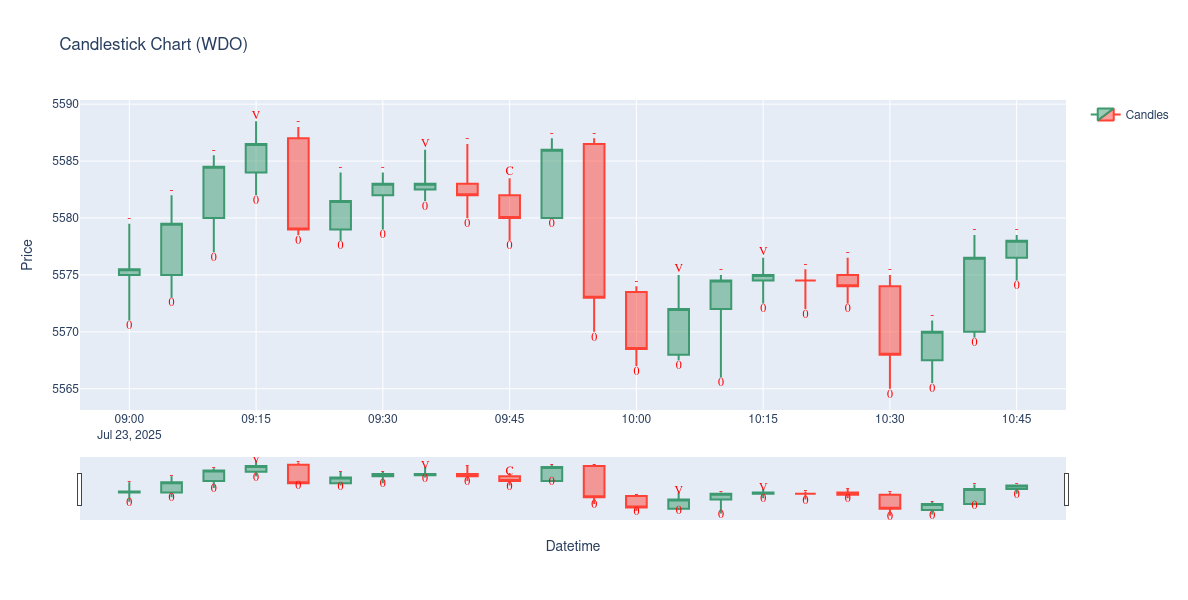

In [17]:
fig = go.Figure(data=[go.Candlestick(x=df['Datetime'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     name='Candles')])

fig.add_trace(go.Scatter(
    x=df['Datetime'],
    y=df['High'] + 0.5,
    text=df['Op'],
    mode='text',
    textposition='middle center',
    textfont=dict(
        size=12,
        color='red',
        family='Arial'
    ),
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=df['Datetime'],
    y=df['Low'] - 0.5,
    text=df['Structure'],
    mode='text',
    textposition='middle center',
    textfont=dict(
        size=12,
        color='red',
        family='Arial'
    ),
    showlegend=False
))

fig.update_layout(title='Candlestick Chart (WDO)',
                  xaxis_title='Datetime',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=True,
                  height=600,
                  width=1000)

In [15]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Datetime,2025-07-22 09:00:00,2025-07-22 09:05:00,2025-07-22 09:10:00,2025-07-22 09:15:00,2025-07-22 09:20:00,2025-07-22 09:25:00,2025-07-22 09:30:00,2025-07-22 09:35:00,2025-07-22 09:40:00,2025-07-22 09:45:00,2025-07-22 09:50:00,2025-07-22 09:55:00,2025-07-22 10:00:00,2025-07-22 10:05:00,2025-07-22 10:10:00,2025-07-22 10:15:00,2025-07-22 10:20:00,2025-07-22 10:25:00,2025-07-22 10:30:00,2025-07-22 10:35:00
Total_Buy_Agg_Volume,20896.0,9868.0,12060.0,19537.0,15685.0,23804.0,21284.0,17032.0,15980.0,18363.0,8309.0,11456.0,13622.0,17764.0,19491.3,8014.0,4368.0,10914.0,12995.0,0.0
Total_Sell_Agg_Volume,22218.0,8519.0,25373.0,15033.0,11712.0,13124.0,20075.0,9952.0,11617.0,28511.0,26441.0,5966.0,18836.0,27915.0,26992.0,8132.0,8127.0,16083.0,10452.0,0.0
Delta_Agg,-1322.0,1349.0,-13313.0,4504.0,3973.0,10680.0,1209.0,7080.0,4363.0,-10148.0,-18132.0,5490.0,-5214.0,-10151.0,-7500.7,-118.0,-3759.0,-5169.0,2543.0,0.0
Delta_Agg_Abs,1322.0,1349.0,13313.0,4504.0,3973.0,10680.0,1209.0,7080.0,4363.0,10148.0,18132.0,5490.0,5214.0,10151.0,7500.7,118.0,3759.0,5169.0,2543.0,0.0
Open,5584.5,5582.5,5585.5,5576.5,5582.0,5584.0,5591.0,5590.5,5595.0,5598.0,5595.0,5585.5,5589.5,5586.5,5584.0,5580.0,5579.5,5576.5,5578.5,5580.0
High,5588.0,5587.0,5585.5,5582.5,5587.5,5591.5,5594.0,5596.0,5599.0,5599.5,5596.0,5590.0,5592.0,5587.0,5584.5,5582.5,5580.0,5579.5,5581.0,5581.0
Low,5580.5,5582.5,5575.0,5573.0,5582.0,5583.0,5586.5,5589.5,5594.0,5589.5,5584.0,5584.5,5584.5,5580.5,5575.0,5577.5,5576.0,5574.0,5574.0,5578.0
Close,5582.5,5585.5,5576.5,5582.5,5584.0,5590.5,5591.0,5595.0,5597.5,5595.0,5585.5,5589.0,5586.5,5584.0,5580.0,5579.5,5576.0,5578.5,5580.0,5580.5
Structure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df = pd.read_csv("tmp/logs.txt", delimiter="\t", low_memory=False)
df = df[df["Op_Result"] != "-"]
df

,Entry_Candle_Datetime,Entry_Price,Take_Profit,Stop_Loss,Op,Exit_Candle_Datetime,Exit_Price,Exit_Times_and_Trades_Datetime,Op_Result
0,2024/05/02 10:15:00,2024/05/02 10:16:22,2024/05/02 10:40:00,2024/05/02 10:41:31,5144.5,5134.5,5154.5,V,TP
1,2024/05/02 10:30:00,2024/05/02 10:31:31,2024/05/02 10:40:00,2024/05/02 10:44:53,5138.5,5128.5,5148.5,V,TP
2,2024/05/02 10:50:00,2024/05/02 10:51:29,2024/05/02 14:45:00,2024/05/02 14:47:32,5125.5,5115.5,5135.5,V,TP
3,2024/05/02 11:15:00,2024/05/02 11:15:22,2024/05/02 14:20:00,2024/05/02 14:22:45,5127.5,5117.5,5137.5,V,TP
4,2024/05/02 13:15:00,2024/05/02 13:15:42,2024/05/02 14:25:00,2024/05/02 14:28:56,5127.0,5117.0,5137.0,V,TP
5,2024/05/02 14:45:00,2024/05/02 14:47:32,2024/05/02 16:05:00,2024/05/02 16:09:06,5115.5,5105.5,5125.5,V,SL
6,2024/05/03 09:30:00,2024/05/03 09:30:01,2024/05/03 09:30:00,2024/05/03 09:30:01,5118.0,5108.0,5128.0,V,TP
7,2024/05/03 10:10:00,2024/05/03 10:10:26,2024/05/03 10:30:00,2024/05/03 10:33:28,5068.5,5058.5,5078.5,V,SL
9,2024/05/03 12:30:00,2024/05/03 12:30:20,2024/05/03 18:25:00,2024/05/03 18:25:04,5079.5,5069.5,5089.5,V,SL
10,2024/05/07 09:15:00,2024/05/07 09:15:41,2024/05/07 09:25:00,2024/05/07 09:29:59,5083.0,5073.0,5093.0,V,SL


In [26]:
df["Op_Result"].value_counts()

Op_Result
SL    21
TP    14
Name: count, dtype: int64